In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
submission_data = pd.read_csv("sample_submission.csv")

In [3]:
type(pd)


module

In [4]:
train_data

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.300
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.700
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.000
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.900
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
629995,629995,18,female,b.tech,4.86,70.7,yes,4.1,good,mixed,high,moderate,69.500
629996,629996,21,female,ba,7.08,54.4,yes,4.5,average,mixed,low,moderate,78.900
629997,629997,24,male,bca,0.64,44.2,yes,4.3,poor,online videos,low,moderate,19.599
629998,629998,20,male,b.com,1.54,75.1,yes,8.2,average,group study,high,moderate,59.100


In [5]:
train_data.isnull().sum()

id                  0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

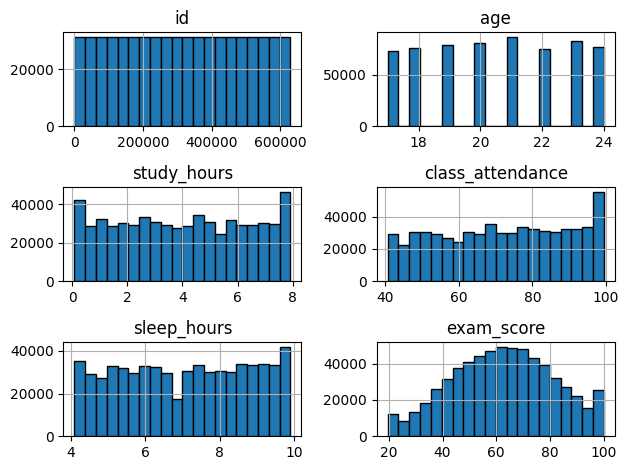

In [6]:
import matplotlib.pyplot as plt

train_data.hist(bins=20,edgecolor = "black")
plt.tight_layout()
plt.show()


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                630000 non-null  int64  
 1   age               630000 non-null  int64  
 2   gender            630000 non-null  object 
 3   course            630000 non-null  object 
 4   study_hours       630000 non-null  float64
 5   class_attendance  630000 non-null  float64
 6   internet_access   630000 non-null  object 
 7   sleep_hours       630000 non-null  float64
 8   sleep_quality     630000 non-null  object 
 9   study_method      630000 non-null  object 
 10  facility_rating   630000 non-null  object 
 11  exam_difficulty   630000 non-null  object 
 12  exam_score        630000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ MB


In [8]:
from sklearn.preprocessing import LabelEncoder


In [9]:
encode = LabelEncoder()

In [10]:
col_cols = train_data.select_dtypes(include = ["object"]).columns

for col in col_cols:
    train_data[col] = encode.fit_transform(train_data[col])
    test_data[col] = encode.fit_transform(test_data[col])

In [11]:
train_data.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,0,1,7.91,98.8,0,4.9,0,3,1,0,78.3
1,1,18,2,6,4.95,94.8,1,4.7,2,4,2,2,46.7
2,2,20,0,1,4.68,92.6,1,5.8,2,0,0,2,99.0
3,3,19,1,1,2.00,49.5,1,8.3,0,1,0,2,63.9
4,4,23,1,5,7.65,86.9,1,9.6,1,4,0,0,100.0


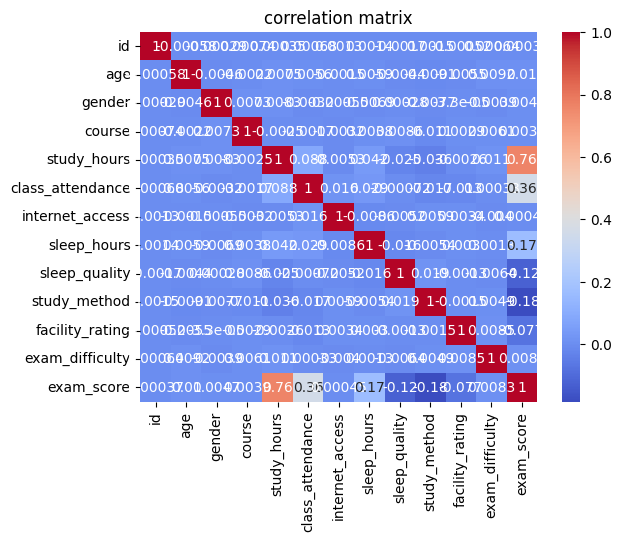

In [12]:
#correlation matrix
import seaborn as sns

corr = train_data.corr(numeric_only=True)

sns.heatmap(corr,annot = True,cmap = "coolwarm")
plt.title("correlation matrix")
plt.show()

In [13]:
x = train_data.drop(['id','exam_score'],axis = 1)
y = train_data['exam_score']

In [14]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [15]:
# models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor



In [16]:
models = {
    "Lr":LinearRegression(),
    "Dt":DecisionTreeRegressor(random_state = 42),
    "Rf":RandomForestRegressor(random_state = 42),
    "Knn":KNeighborsRegressor()
}

# result = {}
# for name,model in models.items():
#     model.fit(x_train,y_train)
#     y_pred = model.predict(x_test)
#     cv_scores = cross_val_score(model,x,y,cv = 3)
#     result[name] = cv_scores.mean()
#     print(f"{name} CV Accuracy: {cv_scores.mean():.4f}")

# # best model

# best_model_name = max(result,key = result.get)
# print("Best Model:",best_model_name)

In [17]:
model = RandomForestRegressor(random_state=42)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [19]:
new_data = [[18,2,6,4.95,94.8,1,4.7,2,4,2,2]]
predict_new_data = model.predict(new_data)

c:\Users\Saurabh Maurya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [20]:
print(predict_new_data)

[54.029]


In [21]:
test_data.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty
0,630000,24,2,3,6.85,65.2,1,5.2,2,1,0,0
1,630001,18,1,6,6.61,45.0,0,9.3,2,0,1,0
2,630002,24,0,2,6.60,98.5,1,6.2,1,1,2,2
3,630003,24,1,6,3.03,66.3,1,5.7,0,2,2,2
4,630004,20,0,2,2.03,42.4,1,9.2,0,0,1,2


In [22]:
x_test_submission = test_data.drop(['id'],axis = 1)
test_prediction = model.predict(x_test_submission)
submission_data['exam_score'] = test_prediction
submission_data.to_csv('submission_data.csv',index = False)

In [25]:
import pickle 


In [27]:
pickle.dump(model,open("predict.ipynb_model.pkl","wb"))